In [1]:
import torch

In [2]:
torch.load('output.tmp/final.checkpoint')

{'epoch': 99,
 'test_accuracy': 0.8431000208854675,
 'model_state_dict': OrderedDict([('positional_encoding',
               tensor([[[-1.6003e-03, -7.0266e-04,  5.4039e-04,  ...,  2.3288e-03,
                         -1.4148e-04, -1.4504e-03],
                        [-7.6807e-03, -1.1887e-02,  1.1427e-01,  ...,  4.8653e-02,
                         -3.5127e-02,  8.4476e-02],
                        [-2.6648e-02,  4.9016e-03,  2.0225e-02,  ...,  7.2999e-02,
                          4.0307e-02, -3.8537e-02],
                        ...,
                        [-9.7940e-04,  1.2713e-04,  5.8968e-04,  ..., -1.1587e-03,
                         -1.7894e-03,  8.2065e-04],
                        [-2.7747e-03,  1.6253e-04, -4.0903e-05,  ...,  3.7719e-04,
                         -2.5417e-03, -5.0782e-04],
                        [-1.0826e-03, -2.0541e-04, -6.1598e-04,  ...,  2.5957e-03,
                          8.2031e-04, -1.3127e-05]],
               
                       [[-5.3761e-

In [5]:
loaded_checkpoint = Out[2]

In [6]:
loaded_checkpoint.keys()

dict_keys(['epoch', 'test_accuracy', 'model_state_dict'])

In [17]:
from train import get_model, get_dataset

In [11]:
model = get_model('cuda:0')

In [16]:
model.load_state_dict(loaded_checkpoint['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [19]:
training_loader, test_loader = get_dataset(100)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
batch = next(iter(training_loader))

In [25]:
batch_x, batch_y, batch_mask = batch

In [28]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


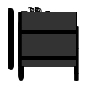

In [40]:
f, ax = plt.subplots(3, 3, figsize=(1,1) )
ax[0].imshow(batch_x[0].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


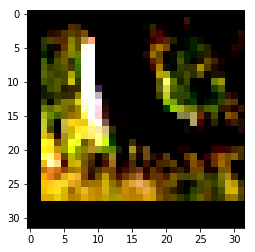

In [41]:
plt.imshow(batch_x[0].permute(1,2,0))

tensor([[[-2.4291e+00, -2.4291e+00, -7.0381e-01,  ...,  1.3434e-02,
           1.3434e-02, -1.0288e-01],
         [-2.4291e+00, -2.4291e+00, -5.4873e-01,  ...,  1.3434e-02,
          -1.9980e-01, -2.9672e-01],
         [-2.4291e+00, -2.4291e+00, -4.3242e-01,  ..., -4.9057e-01,
          -2.7734e-01, -1.0288e-01],
         ...,
         [-2.4291e+00, -2.4291e+00, -2.4291e+00,  ..., -2.4291e+00,
          -2.4291e+00, -2.4291e+00],
         [-2.4291e+00, -2.4291e+00, -2.4291e+00,  ..., -2.4291e+00,
          -2.4291e+00, -2.4291e+00],
         [-2.4291e+00, -2.4291e+00, -2.4291e+00,  ..., -2.4291e+00,
          -2.4291e+00, -2.4291e+00]],

        [[-2.4183e+00, -2.4183e+00, -5.3024e-01,  ...,  7.6703e-04,
          -9.7567e-02, -2.1557e-01],
         [-2.4183e+00, -2.4183e+00, -3.9257e-01,  ..., -1.8900e-02,
          -1.9590e-01, -3.1390e-01],
         [-2.4183e+00, -2.4183e+00, -3.1390e-01,  ..., -5.6957e-01,
          -2.9424e-01, -1.1723e-01],
         ...,
         [-2.4183e+00, -2

In [47]:
batch_x = batch_x.to('cuda:0')
batch_mask = batch_mask.to('cuda:0')
out = model(batch_x, batch_mask)

In [50]:
prediction, image_out, reconstruction, reconstruction_mask = out

In [58]:
reconstruction_mask[0].shape

torch.Size([8, 8])

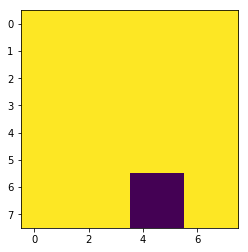

In [62]:
plt.imshow(reconstruction_mask[5].cpu().numpy())

In [60]:
model

BertImage(
  (extract_feature): ResBottom(
    (seq): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (d